Here’s a mini-lab where we:

Use an image
Apply convolutions with different strides and paddings
Visualize the output shapes

In [22]:
import torch

import torch.nn as nn

import matplotlib.pyplot as plt

import torchvision.transforms as transforms

from torchvision.datasets import MNIST

from torch.utils.data import DataLoader

In [23]:
# Load a single image from MNIST

transform = transforms.ToTensor()

dataset = MNIST(root = './data', train=True, download='True', transform=transform)

image, _ = dataset[0]  # Shape: (1, 28, 28)

In [24]:
# Visual helper

def show(img, title=''):

    plt.imshow(img.squeeze(), cmap='gray')

    plt.title(title)

    plt.axis('off')

    plt.show()

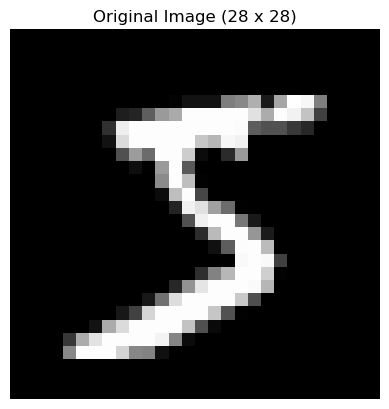

In [25]:
# Show original

show(image, 'Original Image (28 x 28)')

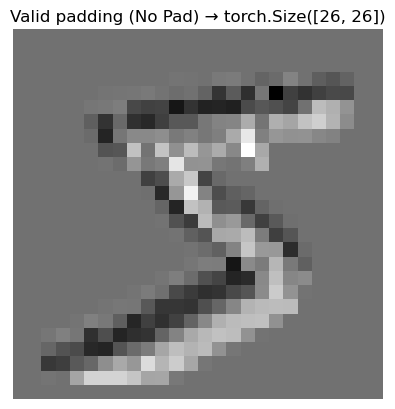

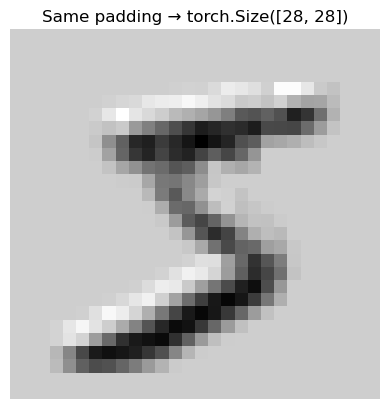

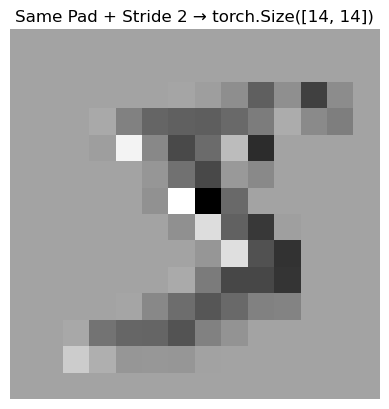

In [26]:
# Define convolutional layers with various strides/paddings

conv_valid = nn.Conv2d(1,1, kernel_size=3, stride=1, padding=0)   # Valid (no padding)

conv_same = nn.Conv2d(1,1, kernel_size=3, stride=1, padding=1)   # Same padding

conv_stride2 = nn.Conv2d(1,1, kernel_size=3, stride=2, padding=1)   # Same padding, Stride = 2


# Apply each convolution

with torch.no_grad():

    out_valid = conv_valid(image.unsqueeze(0))

    out_same = conv_same(image.unsqueeze(0))

    out_stride2 = conv_stride2(image.unsqueeze(0))


# Visualize

show(out_valid[0], f'Valid padding (No Pad) → {out_valid.shape[-2:]}')

show(out_same[0], f'Same padding → {out_same.shape[-2:]}')

show(out_stride2[0], f'Same Pad + Stride 2 → {out_stride2.shape[-2:]}')